<a href="https://colab.research.google.com/github/King-of-Haskul/Machine-Learning-And-Data-Science/blob/main/IMDB_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import keras
import numpy as np

In [6]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #num_words will pick the top 10000 common words

17473536/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [23]:
word_index = imdb.get_word_index()
 #word_index is a dictionary mapping words to an integer index

reverse_word_index = dict( [(value, key) for (key, value) in word_index.items()])   #Reversing the dictionary

decoded_review = ' '.join([reverse_word_index.get(i-3, '') for i in train_data[0]])
#Decodes the review. The indices are offset by 3 because 0,1, and 2 are reserved incdices for "padding", "start of the sequence" and "unknown"
#'' in the get() return the value for the specific key index as string

In [24]:
print(decoded_review)

 this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the 

### Encoding the integer sequences into a binary matrix (One-hot encoding)


In [27]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension)) 
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1  #sequence is a list containg integers between 0 and 10000 i.e. corresponding to each word
  return results

In [29]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [30]:
x_train.shape 
#now each example is a 10000 dimensional vector which is one-hot encoded for whether a word is present or not. 1 if present and 0 otherwise

(25000, 10000)

In [32]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### The Model Definition

In [33]:
from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

### Creating a validation set

In [35]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Training the model

In [36]:
history = model.fit(partial_x_train, partial_y_train,  epochs=20, batch_size=512, validation_data= (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 16s 58ms/step - loss: 0.5942 - accuracy: 0.6917 - val_loss: 0.3890 - val_accuracy: 0.8718
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3229 - accuracy: 0.9016 - val_loss: 0.3123 - val_accuracy: 0.8806
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2280 - accuracy: 0.9277 - val_loss: 0.2986 - val_accuracy: 0.8804
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1699 - accuracy: 0.9474 - val_loss: 0.2811 - val_accuracy: 0.8882
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1343 - accuracy: 0.9575 - val_loss: 0.2964 - val_accuracy: 0.8860
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1095 - accuracy: 0.9695 - val_loss: 0.2967 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0923 - accuracy: 0.9735 - val_loss: 0.3140 - val_accuracy: 0.8844
Epoch 8/20
3

### Plotting the training and validation loss

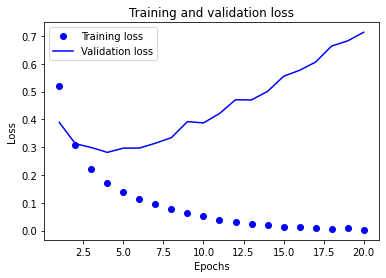

In [38]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss') #'bo' is for blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') #'b' is for solid blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plotting the training and validation accuracy



In [40]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

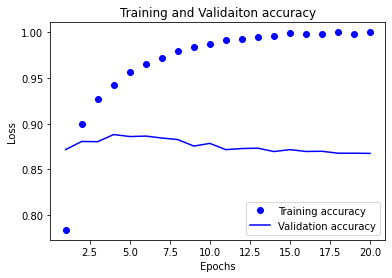

In [42]:
plt.clf()   #clears the figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and Validaiton accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Retraining from scratch a better model
This time with 4 epochs to prevent overfitting


In [44]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train,  epochs=4, batch_size=512)

Epoch 1/4
30/30 [==============================] - 2s 27ms/step - loss: 0.6097 - accuracy: 0.6849
Epoch 2/4
30/30 [==============================] - 1s 27ms/step - loss: 0.3408 - accuracy: 0.8986
Epoch 3/4
30/30 [==============================] - 1s 27ms/step - loss: 0.2310 - accuracy: 0.9319
Epoch 4/4
30/30 [==============================] - 1s 26ms/step - loss: 0.1808 - accuracy: 0.9443


In [45]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 2s 2ms/step - loss: 0.2957 - accuracy: 0.8818


[0.2956797480583191, 0.8818399906158447]